In [ ]:
# Define a function to categorize the responses based on the given thresholds
def categorize_response(value):
    if value < 0.6:
        return "No Response"
    elif 0.6 <= value < 0.7:
        return "Mild"
    elif 0.7 <= value < 1.0:
        return "High"
    else:
        return "Very High"

# Apply the categorization to the 'Median' and 'Mean' columns
df['Median_Category'] = df['Median'].apply(categorize_response)

In [ ]:
# Remove rows where 'Organelle' is 5
data_filtered = df[df['Organelle'] != 5]

# Combine categories 1 and 2 into a single category "1"
data_combined = data_filtered.copy()
data_combined['Organelle'] = data_combined['Organelle'].replace({2: 1})

In [ ]:
data = data_combined.copy()
features = data.columns[5:-5]
print(features)
x = data.loc[:, features].values
y = data.loc[:, 'Organelle'].values
x = StandardScaler().fit_transform(x)

Index(['phil_A', 'phob_A', 'phil_G', 'phob_G', 'phil_V', 'phob_V', 'phil_L',
       'phob_L', 'phil_I', 'phob_I', 'phil_F', 'phob_F', 'phil_W', 'phob_W',
       'phil_M', 'phob_M', 'phil_Y', 'phob_Y', 'phil_C', 'phob_C', 'phil_S',
       'phob_S', 'phil_T', 'phob_T', 'phil_R', 'phob_R', 'phil_K', 'phob_K',
       'phil_N', 'phob_N', 'phil_Q', 'phob_Q', 'phil_D', 'phob_D', 'phil_E',
       'phob_E', 'phil_H', 'phob_H', 'phil_P', 'phob_P'],
      dtype='object')


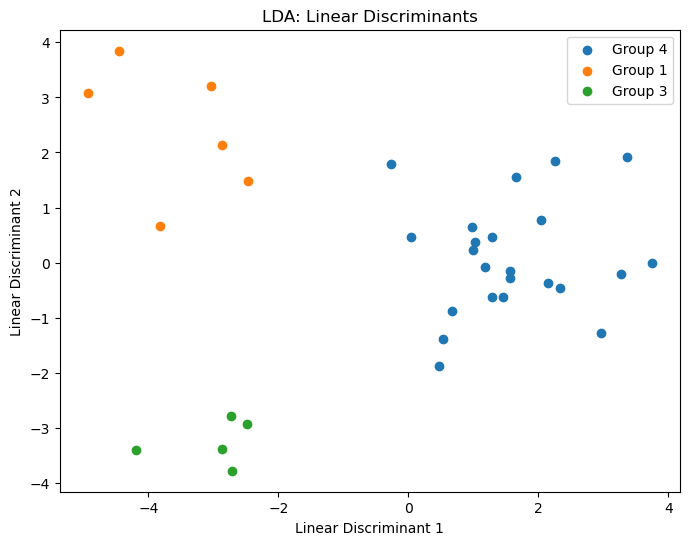

In [ ]:
# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda_components = lda.fit_transform(x, y)
lda_df = pd.DataFrame(data=lda_components, columns=['Linear Discriminant 1', 'Linear Discriminant 2'])
lda_df['Group'] = y

# Plot LDA results
plt.figure(figsize=(8, 6))
for group in lda_df['Group'].unique():
    indices = lda_df['Group'] == group
    plt.scatter(lda_df.loc[indices, 'Linear Discriminant 1'],
                lda_df.loc[indices, 'Linear Discriminant 2'],
                label=f'Group {group}')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA: Linear Discriminants')
plt.legend()
plt.show()

In [ ]:
lda_coefficients = pd.DataFrame(lda.scalings_, columns=['Linear Discriminant 1', 'Linear Discriminant 2'], index=features)
print(lda_coefficients)

        Linear Discriminant 1  Linear Discriminant 2
phil_A               0.759620               1.587809
phob_A              -0.163998              -0.593629
phil_G               1.407858               0.980112
phob_G              -0.013129              -0.497874
phil_V               0.750142               0.505494
phob_V               0.511532               0.076978
phil_L              -0.814666              -0.350699
phob_L               0.481545               1.036175
phil_I              -1.470459              -0.833606
phob_I               0.795243              -0.054190
phil_F              -1.815158              -0.930797
phob_F               1.269834               0.664647
phil_W               0.807984               1.285345
phob_W               0.019677              -0.570538
phil_M              -1.003629              -0.719707
phob_M              -0.385303               0.376281
phil_Y               0.184859               0.249098
phob_Y              -1.891265              -1.

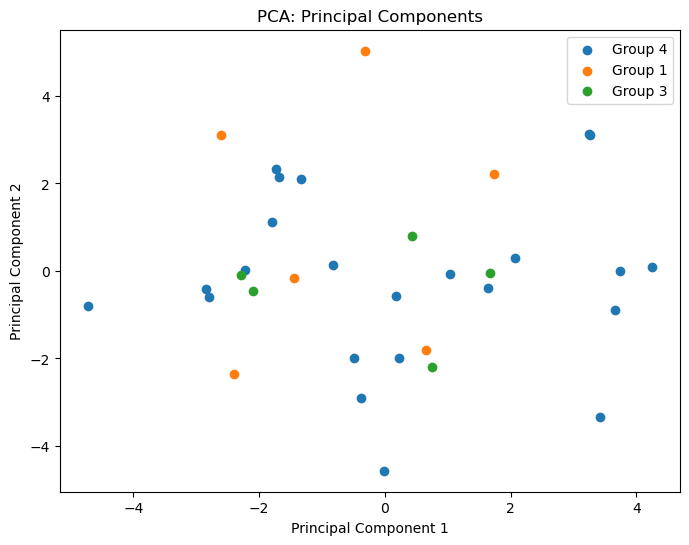

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
principal_df['Group'] = y

# Plot PCA results
plt.figure(figsize=(8, 6))
for group in principal_df['Group'].unique():
    indices = principal_df['Group'] == group
    plt.scatter(principal_df.loc[indices, 'Principal Component 1'],
                principal_df.loc[indices, 'Principal Component 2'],
                label=f'Group {group}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Components')
plt.legend()
plt.show()